In [1]:
# imports
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Scraper
options = Options()
options.headless = True # uses chrome without opening a G.U.I.

# mac os path to chromedriver file
DRIVER_PATH = '/usr/local/bin/chromedriver' 

# windows os path to chrome driver file
# DRIVER_PATH = 'C:/path/to/chromedriver.exe'

# set up our driver with our preset options
driver = webdriver.Chrome(options=options, executable_path=DRIVER_PATH)

# go to the site we want to scrape
driver.get('https://boxofficemojo.com/year/')

# scrape desired data
years = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[1]')
tot_grosses = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[2]')
tot_gross_changes = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[3]')
num_of_releases = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[4]')
avgs_per_release = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[5]')
top_movies = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[6]')

# convert scraped web elements into lists of data
years = [year.text for year in years]
tot_grosses = [tot_gross.text for tot_gross in tot_grosses]
tot_gross_changes = [tot_gross_change.text for tot_gross_change in tot_gross_changes]
num_of_releases = [num_of_release.text for num_of_release in num_of_releases]
avgs_per_release = [avg_per_release.text for avg_per_release in avgs_per_release]
top_movies = [top_movie.text for top_movie in top_movies]

# close our driver
driver.quit()

In [3]:
movies_df = pd.DataFrame({
    'top_movie_of_the_year' : top_movies,
    'year' : years,
    'total_gross' : tot_grosses,
    'change_in_total_gross(%)' : tot_gross_changes,
    'number_of_releases' : num_of_releases,
    'average_gross_per_release' : avgs_per_release,
})

movies_df

,top_movie_of_the_year,year,total_gross,change_in_total_gross(%),number_of_releases,average_gross_per_release
0,Bad Boys for Life,2020,"$1,810,673,262",-,310,"$5,840,881"
1,Avengers: Endgame,2019,"$11,320,885,732",-4.8%,909,"$12,454,219"
2,Black Panther,2018,"$11,889,341,443",+7.4%,993,"$11,973,153"
3,Star Wars: Episode VIII - The Last Jedi,2017,"$11,072,821,415",-2.7%,852,"$12,996,269"
4,Finding Dory,2016,"$11,377,080,039",+2.3%,856,"$13,290,981"
5,Jurassic World,2015,"$11,125,864,078",+7.4%,846,"$13,151,139"
6,Guardians of the Galaxy,2014,"$10,359,575,749",-5.2%,849,"$12,202,091"
7,Iron Man 3,2013,"$10,922,056,542",+0.9%,826,"$13,222,828"
8,The Avengers,2012,"$10,822,811,836",+6.4%,807,"$13,411,167"
9,Harry Potter and the Deathly Hallows: Part 2,2011,"$10,173,623,342",-3.7%,730,"$13,936,470"


In [4]:
movies_df.dtypes

top_movie_of_the_year        object
year                         object
total_gross                  object
change_in_total_gross(%)     object
number_of_releases           object
average_gross_per_release    object
dtype: object

In [5]:
# formatting and cleaning
movies_df['year'] = movies_df['year'].astype(int)
movies_df['number_of_releases'] = movies_df['number_of_releases'].astype(int)
movies_df['total_gross'] = movies_df['total_gross'].map(lambda x: x.split('$')[1].replace(',','')).astype(int)
movies_df['average_gross_per_release'] = movies_df['average_gross_per_release'].map(lambda x: x.split('$')[1].replace(',','')).astype(int)

# calculate current change in total gross for 2020 
movies_df.loc[0, 'change_in_total_gross(%)'] = str(
    round(
    (
        (movies_df['total_gross'][1] - movies_df['total_gross'][0]) / (movies_df['total_gross'][1])
    ) * -100, 1)
) + '%'

movies_df['change_in_total_gross(%)'] = movies_df['change_in_total_gross(%)'].map(lambda x: x.split('%')[0].replace('<','')).astype(float)

movies_df

,top_movie_of_the_year,year,total_gross,change_in_total_gross(%),number_of_releases,average_gross_per_release
0,Bad Boys for Life,2020,1810673262,-84.0,310,5840881
1,Avengers: Endgame,2019,11320885732,-4.8,909,12454219
2,Black Panther,2018,11889341443,7.4,993,11973153
3,Star Wars: Episode VIII - The Last Jedi,2017,11072821415,-2.7,852,12996269
4,Finding Dory,2016,11377080039,2.3,856,13290981
5,Jurassic World,2015,11125864078,7.4,846,13151139
6,Guardians of the Galaxy,2014,10359575749,-5.2,849,12202091
7,Iron Man 3,2013,10922056542,0.9,826,13222828
8,The Avengers,2012,10822811836,6.4,807,13411167
9,Harry Potter and the Deathly Hallows: Part 2,2011,10173623342,-3.7,730,13936470


In [6]:
movies_df.to_csv('../../Data/Selenium/top_movies.csv', index=False)

In [7]:
movies_df.dtypes

top_movie_of_the_year         object
year                           int64
total_gross                    int64
change_in_total_gross(%)     float64
number_of_releases             int64
average_gross_per_release      int64
dtype: object

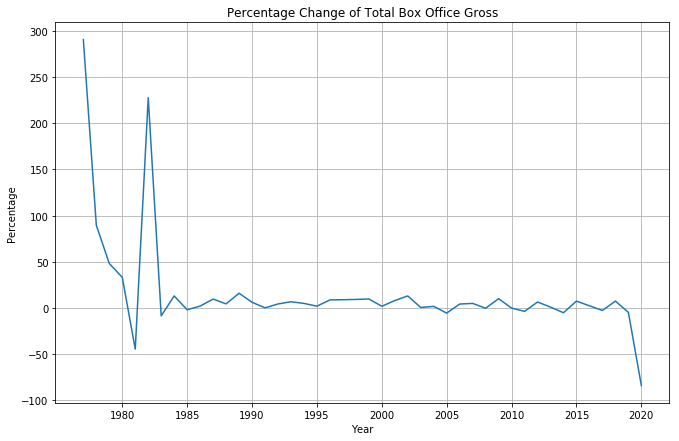

In [8]:
fig, ax = plt.subplots(figsize=(11,7))

ax.plot(movies_df['year'], movies_df['change_in_total_gross(%)'])
ax.set(xlabel='Year',
       ylabel='Percentage',
       title='Percentage Change of Total Box Office Gross',
       xticks=range(1980,2021,5)
      )

ax.grid()
plt.show()

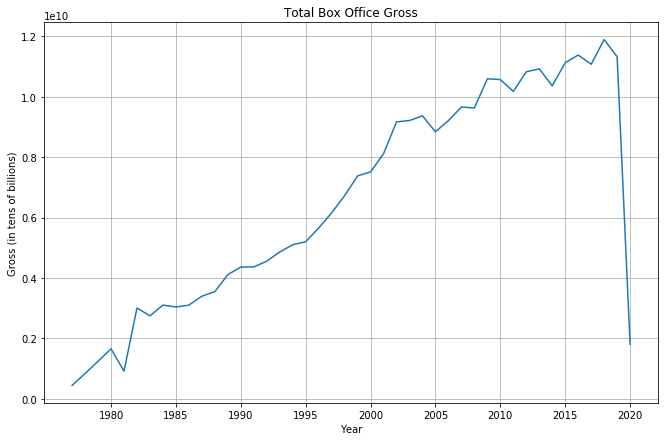

In [9]:
fig, ax = plt.subplots(figsize=(11,7))

ax.plot(movies_df['year'], movies_df['total_gross'])
ax.set(xlabel='Year',
       ylabel='Gross (in tens of billions)',
       title='Total Box Office Gross',
       xticks=range(1980,2021,5),
       yticks=range(0,int(14E9), int(2E9))
      )

ax.grid()
plt.show()

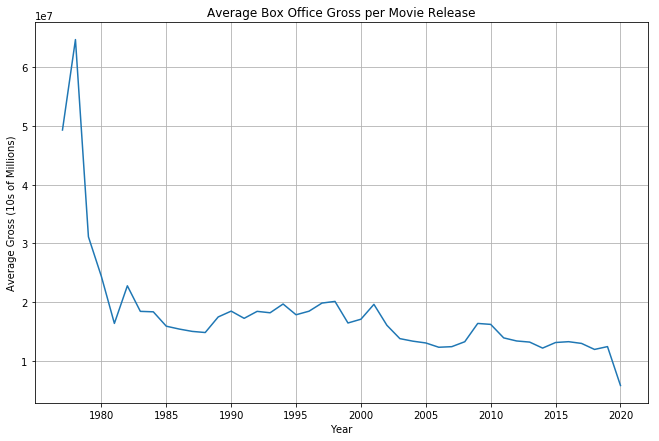

In [10]:
fig, ax = plt.subplots(figsize=(11,7))

ax.plot(movies_df['year'], movies_df['average_gross_per_release'])
ax.set(xlabel='Year',
       ylabel='Average Gross (10s of Millions)',
       title='Average Box Office Gross per Movie Release',
       xticks=range(1980,2021,5)
      )

ax.grid()
plt.show()

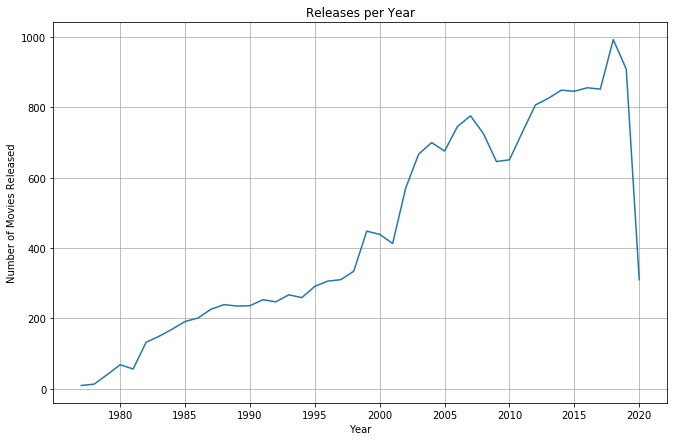

In [11]:
fig, ax = plt.subplots(figsize=(11,7))

ax.plot(movies_df['year'], movies_df['number_of_releases'])
ax.set(xlabel='Year',
       ylabel='Number of Movies Released',
       title='Releases per Year',
       xticks=range(1980,2021,5)
      )

ax.grid()
plt.show()

___
## Total Gross

In [12]:
years_to_scrape = range(1977, 2020)

# create a set of empty lists that we will populate with our movie data
running_ids = []
running_titles = []
running_tot_grosses = []
running_theaters_per_movie = []
running_release_dates = []
running_year = []

In [13]:
t0 = time.time() # timer
counter = 0

# Scraper
options = Options()
options.headless = True

DRIVER_PATH = '/usr/local/bin/chromedriver'

# set up the driver
driver = webdriver.Chrome(options=options, executable_path=DRIVER_PATH)

# let's loop through each year
for counter, year_to_scrape in enumerate(years_to_scrape):

    # Go to the site we want to scrape
    driver.get(f'https://www.boxofficemojo.com/year/{year_to_scrape}/')
    
    # get the total number of entries per year
    entries = len(driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr'))

    # scrape the data we're after
    titles = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[2]/a')
    ids = [title.get_attribute('href').split('/')[4] for title in titles]
    total_grosses = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[8]')
    theaters_per_movie = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[7]')
    release_dates = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[9]')
    
    # get the text from the web elements and save them to our running lists
    running_ids += ids
    running_titles += [title.text for title in titles]
    running_tot_grosses += [total_gross.text for total_gross in total_grosses]
    running_theaters_per_movie += [theaters.text for theaters in theaters_per_movie]
    running_release_dates += [release_date.text for release_date in release_dates]
    running_year += [year_to_scrape for _ in range(entries-1)]
    
    # timer
    if counter % 5 == 0:
        print(f'scraped {counter} years')
        print(f'current runtime is {round((time.time() - t0)/60,2)} mins')
        print('----------')
    

# close the driver
driver.quit()

scraped 0 years
current runtime is 0.07 mins
----------
scraped 5 years
current runtime is 0.58 mins
----------
scraped 10 years
current runtime is 2.21 mins
----------
scraped 15 years
current runtime is 4.34 mins
----------
scraped 20 years
current runtime is 6.88 mins
----------
scraped 25 years
current runtime is 11.12 mins
----------
scraped 30 years
current runtime is 18.58 mins
----------
scraped 35 years
current runtime is 25.64 mins
----------
scraped 40 years
current runtime is 34.82 mins
----------


In [14]:
movies_dict = {
    'bom_id': running_ids,
    'title': running_titles,
    'total_gross' : running_tot_grosses,
    'theaters' : running_theaters_per_movie,
    'release_date' : running_release_dates,
    'year' : running_year
}

In [15]:
movies_df = pd.DataFrame(movies_dict)
movies_df

,bom_id,title,total_gross,theaters,release_date,year
0,rl2759034369,Star Wars: Episode IV - A New Hope,"$307,263,857","1,750",May 25,1977
1,rl3561784833,The Deep,"$47,346,365",731,Jun 17,1977
2,rl2004059649,The Spy Who Loved Me,"$46,838,673",200,Jul 13,1977
3,rl2137425409,"Oh, God!","$41,687,243",198,Oct 7,1977
4,rl1582335489,Exorcist II: The Heretic,"$30,749,142",703,Jun 17,1977
...,...,...,...,...,...,...
19351,rl1241941505,Henchmen,"$1,469",3,Dec 7,2019
19352,rl3506603521,1945,"$1,006,193",19,Nov 1,2019
19353,rl17401345,Tall Tales from the Magical Garden of Antoon K...,$220,20,Jan 11,2019
19354,rl268928513,Over the Limit,"$3,243",2,Oct 12,2019


In [16]:
# remove an duplicates while keeping the entry with the year of original release
movies_df = movies_df.drop(
    movies_df.loc[movies_df.duplicated('bom_id', 'first')].index
)

movies_df

,bom_id,title,total_gross,theaters,release_date,year
0,rl2759034369,Star Wars: Episode IV - A New Hope,"$307,263,857","1,750",May 25,1977
1,rl3561784833,The Deep,"$47,346,365",731,Jun 17,1977
2,rl2004059649,The Spy Who Loved Me,"$46,838,673",200,Jul 13,1977
3,rl2137425409,"Oh, God!","$41,687,243",198,Oct 7,1977
4,rl1582335489,Exorcist II: The Heretic,"$30,749,142",703,Jun 17,1977
...,...,...,...,...,...,...
19341,rl2835973633,The Hours and Times,"$1,273",1,Mar 1,2019
19342,rl933790209,Chinese Portrait,"$4,140",2,Dec 13,2019
19344,rl621184513,The Untold Story,$790,1,Jan 18,2019
19350,rl3389556225,In Safe Hands,"$1,737",1,Jul 26,2019


In [17]:
movies_df.loc[movies_df['year'] == 1977]

,bom_id,title,total_gross,theaters,release_date,year
0,rl2759034369,Star Wars: Episode IV - A New Hope,"$307,263,857","1,750",May 25,1977
1,rl3561784833,The Deep,"$47,346,365",731,Jun 17,1977
2,rl2004059649,The Spy Who Loved Me,"$46,838,673",200,Jul 13,1977
3,rl2137425409,"Oh, God!","$41,687,243",198,Oct 7,1977
4,rl1582335489,Exorcist II: The Heretic,"$30,749,142",703,Jun 17,1977
5,rl611747329,The Turning Point,"$25,933,445",5,Nov 14,1977
6,rl3093399041,Looking for Mr. Goodbar,"$22,512,655",110,Oct 19,1977
7,rl2926544385,Saturday Night Fever,"$94,213,184",726,Dec 16,1977
8,rl340428289,Close Encounters of the Third Kind,"$116,395,460",650,Nov 16,1977


In [18]:
movies_df.to_csv('../../Data/Selenium/movies_1977-2020.csv', index=False)

___
## Summary

In [19]:
top_movies_df = pd.read_csv('../../Data/Selenium/top_movies.csv')
top_movies_df.head()

,top_movie_of_the_year,year,total_gross,change_in_total_gross(%),number_of_releases,average_gross_per_release
0,Bad Boys for Life,2020,1810673262,-84.0,310,5840881
1,Avengers: Endgame,2019,11320885732,-4.8,909,12454219
2,Black Panther,2018,11889341443,7.4,993,11973153
3,Star Wars: Episode VIII - The Last Jedi,2017,11072821415,-2.7,852,12996269
4,Finding Dory,2016,11377080039,2.3,856,13290981


In [20]:
top_movies_df.shape

(44, 6)

In [21]:
movies_df = pd.read_csv('../../Data/Selenium/movies_1977-2020.csv')
movies_df.head()

,bom_id,title,total_gross,theaters,release_date,year
0,rl2759034369,Star Wars: Episode IV - A New Hope,"$307,263,857","1,750",May 25,1977
1,rl3561784833,The Deep,"$47,346,365",731,Jun 17,1977
2,rl2004059649,The Spy Who Loved Me,"$46,838,673",200,Jul 13,1977
3,rl2137425409,"Oh, God!","$41,687,243",198,Oct 7,1977
4,rl1582335489,Exorcist II: The Heretic,"$30,749,142",703,Jun 17,1977


In [22]:
movies_df.shape

(16247, 6)

In [23]:
# get a list of all the bom_ids to loop through
bom_ids = movies_df['bom_id'].values

In [24]:
len(bom_ids)

16247

In [25]:
# create a set of empty lists that we will populate with our movie data
running_bom_ids = []
running_imdb_ids = []
running_titles = []
running_summary_infos = []
running_gross_infos = []

In [26]:
t0 = time.time() # timer
counter = 0

# Movie Summary Scraper
options = Options()
options.headless = True

DRIVER_PATH = '/usr/local/bin/chromedriver'

# set up the driver
driver = webdriver.Chrome(options=options, executable_path=DRIVER_PATH)

# loop through each movie
for counter, bom_id in enumerate(bom_ids):

    # go to page to scrape
    driver.get(f'https://www.boxofficemojo.com/release/{bom_id}')

    # scrape desired information
    # imdb_id
    try:
        ele = driver.find_element_by_xpath('//*[@id="title-summary-refiner"]/a')
        imdb_id = ele.get_attribute('href').split('/')[4]
    except:
        imdb_id = "ERROR!!"

    # title
    try:
        title_ele = driver.find_element_by_xpath('//*[@id="a-page"]/main/div/div[1]/div[1]/div/div/div[2]/h1')
        title = title_ele.text
    except:
        title = "ERROR!!"

    # summary info
    try:
        summary_ele = driver.find_element_by_xpath('//*[@id="a-page"]/main/div/div[3]/div[4]')
        summary = summary_ele.text
    except:
        summary = "ERROR!!"
        
    # gross info
    try:
        gross_ele = driver.find_element_by_xpath('//*[@id="a-page"]/main/div/div[3]/div[1]/div')
        gross = gross_ele.text
    except:
        gross = "ERROR!!"

    # add scraped info to our running lists
    running_bom_ids.append(bom_id)
    running_imdb_ids.append(imdb_id)
    running_titles.append(title)
    running_summary_infos.append(summary)
    running_gross_infos.append(gross)
    
    # timer
    if counter % 500 == 0:
        print(f'scraped {counter} movies')
        print(f'current runtime is {round((time.time() - t0)/60,2)} mins')
        print('----------')
    
# close the driver
driver.quit()

print(f'total runtime is {round((time.time() - t0)/60,2)} mins')

scraped 0 movies
current runtime is 0.07 mins
----------
scraped 500 movies
current runtime is 7.38 mins
----------
scraped 1000 movies
current runtime is 14.97 mins
----------
scraped 1500 movies
current runtime is 22.57 mins
----------
scraped 2000 movies
current runtime is 30.24 mins
----------
scraped 2500 movies
current runtime is 37.95 mins
----------
scraped 3000 movies
current runtime is 45.37 mins
----------
scraped 3500 movies
current runtime is 53.37 mins
----------
scraped 4000 movies
current runtime is 61.06 mins
----------
scraped 4500 movies
current runtime is 68.8 mins
----------
scraped 5000 movies
current runtime is 77.22 mins
----------
scraped 5500 movies
current runtime is 84.89 mins
----------
scraped 6000 movies
current runtime is 92.47 mins
----------
scraped 6500 movies
current runtime is 100.27 mins
----------
scraped 7000 movies
current runtime is 108.12 mins
----------
scraped 7500 movies
current runtime is 115.73 mins
----------
scraped 8000 movies
current 

In [27]:
summary_dict = {
    'bom_id' : running_bom_ids,
    'imdb_id' : running_imdb_ids,
    'title' : running_titles,
    'movie_summary' : running_summary_infos,
    'gross' : running_gross_infos
}

summary_df = pd.DataFrame(summary_dict)
summary_df

,bom_id,imdb_id,title,movie_summary,gross
0,rl2759034369,tt0076759,Star Wars: Episode IV - A New Hope,Distributor\nTwentieth Century Fox\nSee full c...,"Grosses\nDOMESTIC (61.1%)\n$307,263,857\nINTER..."
1,rl3561784833,tt0075925,The Deep,Distributor\nColumbia Pictures\nSee full compa...,"Grosses\nDOMESTIC (100%)\n$47,346,365\nINTERNA..."
2,rl2004059649,tt0076752,The Spy Who Loved Me,Distributor\nUnited Artists\nSee full company ...,"Grosses\nDOMESTIC (100%)\n$46,838,673\nINTERNA..."
3,rl2137425409,tt0076489,"Oh, God!",Distributor\nWarner Bros.\nSee full company in...,"Grosses\nDOMESTIC (100%)\n$41,687,243\nINTERNA..."
4,rl1582335489,tt0076009,Exorcist II: The Heretic,Distributor\nWarner Bros.\nSee full company in...,"Grosses\nDOMESTIC (100%)\n$30,749,142\nINTERNA..."
...,...,...,...,...,...
16242,rl2835973633,tt0104448,The Hours and Times,Distributor\nOscilloscope\nSee full company in...,"Grosses\nDOMESTIC (100%)\n$1,273\nINTERNATIONA..."
16243,rl933790209,tt9434778,Chinese Portrait,Distributor\nThe Cinema Guild\nSee full compan...,"Grosses\nDOMESTIC (100%)\n$4,140\nINTERNATIONA..."
16244,rl621184513,tt3737840,The Untold Story,Distributor\nAmmo Content\nSee full company in...,Grosses\nDOMESTIC (100%)\n$790\nINTERNATIONAL ...
16245,rl3389556225,tt7543930,In Safe Hands,Distributor\nDistrib Films\nSee full company i...,"Grosses\nDOMESTIC (–)\n$1,737\nINTERNATIONAL (..."


In [28]:
summary_df.loc[0]['movie_summary']

'Distributor\nTwentieth Century Fox\nSee full company information\nOpening\n$1,554,475\n43 theaters\nBudget\n$11,000,000\nRelease Date (Wide)\nMay 25, 1977 (Jul 15, 1977)\nMPAA\nPG\nRunning Time\n2 hr 1 min\nGenres\nAction Adventure Fantasy Sci-Fi\nIn Release\n951 days/135 weeks\nWidest Release\n1,750 theaters\nIMDbPro\nSee more details at IMDbPro'

In [29]:
summary_df.loc[0]['gross']

'Grosses\nDOMESTIC (61.1%)\n$307,263,857\nINTERNATIONAL (38.9%)\n$195,751,992\nWORLDWIDE\n$503,015,849'

In [30]:
summary_df.loc[summary_df['imdb_id'] == "ERROR!!"]

,bom_id,imdb_id,title,movie_summary,gross
2163,rl4131489281,ERROR!!,"Dancing/The Song of Wolfgang the Intrepid, the...",Distributor\nExpanded Entertainment\nSee full ...,"Grosses\nDOMESTIC (100%)\n$181,273\nINTERNATIO..."
3666,rl2672395777,ERROR!!,Bugs Bunny Film Festival,Distributor\nWarner Bros.\nSee full company in...,"Grosses\nDOMESTIC (100%)\n$413,076\nINTERNATIO..."
4105,rl1836549633,ERROR!!,Tout Truffaut,Distributor\nWinStar Cinema\nSee full company ...,"Grosses\nDOMESTIC (100%)\n$11,206\nINTERNATION..."
4971,rl695436801,ERROR!!,Spider-Man/Men in Black II,Distributor\nSony Pictures Entertainment (SPE)...,"Grosses\nDOMESTIC (100%)\n$6,632,970\nINTERNAT..."
5052,rl3361506817,ERROR!!,Kurosawa & Mifune Festival,Distributor\nCowboy Pictures\nSee full company...,"Grosses\nDOMESTIC (100%)\n$561,692\nINTERNATIO..."
5152,rl3745744385,ERROR!!,Tarkovsky At 70,Distributor\nKino International\nSee full comp...,"Grosses\nDOMESTIC (100%)\n$177,345\nINTERNATIO..."
5608,rl1012106753,ERROR!!,The Fassbinder Series,Distributor\nWellspring Media\nSee full compan...,"Grosses\nDOMESTIC (100%)\n$162,885\nINTERNATIO..."
7097,rl3091236353,ERROR!!,After Dark's Horror Fest: 8 Films to Die For,Distributor\nFreestyle Releasing\nSee full com...,"Grosses\nDOMESTIC (100%)\n$2,575,000\nINTERNAT..."
7157,rl2809759233,ERROR!!,Viva Pedro!,Distributor\nSony Pictures Classics\nSee full ...,"Grosses\nDOMESTIC (100%)\n$579,539\nINTERNATIO..."
7421,rl91915777,ERROR!!,The World According to Shorts,Distributor\nNew Yorker Films\nSee full compan...,"Grosses\nDOMESTIC (100%)\n$12,908\nINTERNATION..."


In [31]:
summary_df.loc[summary_df['title'] == "ERROR!!"]

,bom_id,imdb_id,title,movie_summary,gross


In [32]:
summary_df.loc[summary_df['movie_summary'] == "ERROR!!"]

,bom_id,imdb_id,title,movie_summary,gross


In [33]:
summary_df.loc[summary_df['gross'] == "ERROR!!"]

,bom_id,imdb_id,title,movie_summary,gross


In [34]:
# save our file
summary_df.to_csv('../../Data/Selenium/summary.csv', index=False)

In [35]:
summary_df = pd.read_csv('../../Data/Selenium/summary.csv')
summary_df.head()

,bom_id,imdb_id,title,movie_summary,gross
0,rl2759034369,tt0076759,Star Wars: Episode IV - A New Hope,Distributor\nTwentieth Century Fox\nSee full c...,"Grosses\nDOMESTIC (61.1%)\n$307,263,857\nINTER..."
1,rl3561784833,tt0075925,The Deep,Distributor\nColumbia Pictures\nSee full compa...,"Grosses\nDOMESTIC (100%)\n$47,346,365\nINTERNA..."
2,rl2004059649,tt0076752,The Spy Who Loved Me,Distributor\nUnited Artists\nSee full company ...,"Grosses\nDOMESTIC (100%)\n$46,838,673\nINTERNA..."
3,rl2137425409,tt0076489,"Oh, God!",Distributor\nWarner Bros.\nSee full company in...,"Grosses\nDOMESTIC (100%)\n$41,687,243\nINTERNA..."
4,rl1582335489,tt0076009,Exorcist II: The Heretic,Distributor\nWarner Bros.\nSee full company in...,"Grosses\nDOMESTIC (100%)\n$30,749,142\nINTERNA..."


In [36]:
summary_df.shape

(16247, 5)

___
## Cast & Crew

In [37]:
imdb_ids = summary_df['imdb_id'].values

In [38]:
# create a set of empty lists that we will populate with our movie data
running_bom_ids = []
running_imdb_ids = []
running_titles = []
running_crew = []
running_cast = []

In [39]:
t0 = time.time()
counter = 0

# Cast and Crew Scraper
options = Options()
options.headless = True

DRIVER_PATH = '/usr/local/bin/chromedriver'

# set up the driver
driver = webdriver.Chrome(options=options, executable_path=DRIVER_PATH)

for counter, imdb_id in enumerate(imdb_ids):
    
#     # go to page to scrape
#     driver.get(f'https://www.boxofficemojo.com/release/{bom_id}')

    # go to cast and crew page
    driver.get(f'https://www.boxofficemojo.com/title/{imdb_id}/credits/')
    
    # Scrape data
    # imdb_id
    try:
        ele = driver.find_element_by_xpath('//*[@id="title-summary-refiner"]/a')
        imdb_id = ele.get_attribute('href').split('/')[4]
    except:
        imdb_id = "ERROR!!"

    # title
    try:
        title_ele = driver.find_element_by_xpath('//*[@id="a-page"]/main/div/div[1]/div[1]/div/div/div[2]/div/h1')
        title = title_ele.text
    except:
        title = "ERROR!!"

    # crew
    try:
        crew_eles = driver.find_elements_by_xpath('//*[@id="principalCrew"]/tbody/tr/td')
        crew = [crew_ele.text for crew_ele in crew_eles]
    except:
        crew = "ERROR!!"
        
    # cast
    try:
        actor_eles = driver.find_elements_by_xpath('//*[@id="principalCast"]/tbody/tr/td[1]/a')
        actors = [actor_ele.text for actor_ele in actor_eles]
    except:
        actors = "ERROR!!"
        
    # add data to running lists
    running_bom_ids.append(bom_id)
    running_imdb_ids.append(imdb_id)
    running_titles.append(title) 
    running_crew.append(crew) 
    running_cast.append(actors)

    # timer
    if counter % 500 == 0:
        print(f'scraped {counter} movies')
        print(f'current runtime is {round((time.time() - t0)/60,2)} mins')
        print('----------')
        
# close the driver
driver.quit()

print(f'total runtime is {round((time.time() - t0)/60,2)} mins')

scraped 0 movies
current runtime is 0.1 mins
----------
scraped 500 movies
current runtime is 8.65 mins
----------
scraped 1000 movies
current runtime is 17.23 mins
----------
scraped 1500 movies
current runtime is 25.7 mins
----------
scraped 2000 movies
current runtime is 34.41 mins
----------
scraped 2500 movies
current runtime is 43.29 mins
----------
scraped 3000 movies
current runtime is 52.54 mins
----------
scraped 3500 movies
current runtime is 61.7 mins
----------
scraped 4000 movies
current runtime is 71.0 mins
----------
scraped 4500 movies
current runtime is 80.19 mins
----------
scraped 5000 movies
current runtime is 91.1 mins
----------
scraped 5500 movies
current runtime is 101.91 mins
----------
scraped 6000 movies
current runtime is 111.41 mins
----------
scraped 6500 movies
current runtime is 120.98 mins
----------
scraped 7000 movies
current runtime is 130.46 mins
----------
scraped 7500 movies
current runtime is 139.24 mins
----------
scraped 8000 movies
current ru

In [40]:
castcrew_dict = {
    'bom_id' : running_bom_ids,
    'imdb_id' : running_imdb_ids,
    'title' : running_titles,
    'crew' : running_crew,
    'cast' : running_cast
}

castcrew_df = pd.DataFrame(castcrew_dict)
castcrew_df.head()

,bom_id,imdb_id,title,crew,cast
0,rl17401345,tt0076759,Star Wars: Episode IV - A New Hope (1977),"[George Lucas, Director, George Lucas, Writer,...","[Mark Hamill, Harrison Ford, Carrie Fisher, Al..."
1,rl17401345,tt0075925,The Deep (1977),"[Peter Yates, Director, Peter Benchley, Writer...","[Jacqueline Bisset, Nick Nolte, Dick Anthony W..."
2,rl17401345,tt0076752,The Spy Who Loved Me (1977),"[Lewis Gilbert, Director, Christopher Wood, Wr...","[Roger Moore, Barbara Bach, Curd Jürgens, Rich..."
3,rl17401345,tt0076489,"Oh, God! (1977)","[Carl Reiner, Director, Larry Gelbart, Writer,...","[John Denver, George Burns, Teri Garr, Donald ..."
4,rl17401345,tt0076009,Exorcist II: The Heretic (1977),"[John Boorman, Director, Rospo Pallenberg, Dir...","[Richard Burton, Linda Blair, Louise Fletcher,..."


In [41]:
castcrew_df.shape

(16247, 5)

In [42]:
# save our file
castcrew_df.to_csv('../../Data/Selenium/castcrew.csv', index=False)

In [43]:
castcrew_df = pd.read_csv('../../Data/Selenium/castcrew.csv')
castcrew_df.head()

,bom_id,imdb_id,title,crew,cast
0,rl17401345,tt0076759,Star Wars: Episode IV - A New Hope (1977),"['George Lucas', 'Director', 'George Lucas', '...","['Mark Hamill', 'Harrison Ford', 'Carrie Fishe..."
1,rl17401345,tt0075925,The Deep (1977),"['Peter Yates', 'Director', 'Peter Benchley', ...","['Jacqueline Bisset', 'Nick Nolte', 'Dick Anth..."
2,rl17401345,tt0076752,The Spy Who Loved Me (1977),"['Lewis Gilbert', 'Director', 'Christopher Woo...","['Roger Moore', 'Barbara Bach', 'Curd Jürgens'..."
3,rl17401345,tt0076489,"Oh, God! (1977)","['Carl Reiner', 'Director', 'Larry Gelbart', '...","['John Denver', 'George Burns', 'Teri Garr', '..."
4,rl17401345,tt0076009,Exorcist II: The Heretic (1977),"['John Boorman', 'Director', 'Rospo Pallenberg...","['Richard Burton', 'Linda Blair', 'Louise Flet..."


In [44]:
castcrew_df['title'].value_counts()

ERROR!!                                                  35
The Polar Express (2004)                                 12
Santa vs. the Snowman 3D (2002)                           7
The Nightmare Before Christmas (1993)                     6
Spirited Away (2001)                                      4
                                                         ..
Whatever the Heart Says (2005)                            1
The Sun (2005)                                            1
Tiger Zinda Hai (2017)                                    1
Good Burger (1997)                                        1
DuckTales the Movie: Treasure of the Lost Lamp (1990)     1
Name: title, Length: 15921, dtype: int64

In [45]:
castcrew_df.loc[castcrew_df['imdb_id'] == "ERROR!!"]

,bom_id,imdb_id,title,crew,cast
2163,rl17401345,ERROR!!,ERROR!!,[],[]
3666,rl17401345,ERROR!!,ERROR!!,[],[]
4105,rl17401345,ERROR!!,ERROR!!,[],[]
4971,rl17401345,ERROR!!,ERROR!!,[],[]
5052,rl17401345,ERROR!!,ERROR!!,[],[]
5152,rl17401345,ERROR!!,ERROR!!,[],[]
5608,rl17401345,ERROR!!,ERROR!!,[],[]
7097,rl17401345,ERROR!!,ERROR!!,[],[]
7157,rl17401345,ERROR!!,ERROR!!,[],[]
7421,rl17401345,ERROR!!,ERROR!!,[],[]


In [46]:
summary_df.loc[summary_df['imdb_id'] == 'ERROR!!']

,bom_id,imdb_id,title,movie_summary,gross
2163,rl4131489281,ERROR!!,"Dancing/The Song of Wolfgang the Intrepid, the...",Distributor\nExpanded Entertainment\nSee full ...,"Grosses\nDOMESTIC (100%)\n$181,273\nINTERNATIO..."
3666,rl2672395777,ERROR!!,Bugs Bunny Film Festival,Distributor\nWarner Bros.\nSee full company in...,"Grosses\nDOMESTIC (100%)\n$413,076\nINTERNATIO..."
4105,rl1836549633,ERROR!!,Tout Truffaut,Distributor\nWinStar Cinema\nSee full company ...,"Grosses\nDOMESTIC (100%)\n$11,206\nINTERNATION..."
4971,rl695436801,ERROR!!,Spider-Man/Men in Black II,Distributor\nSony Pictures Entertainment (SPE)...,"Grosses\nDOMESTIC (100%)\n$6,632,970\nINTERNAT..."
5052,rl3361506817,ERROR!!,Kurosawa & Mifune Festival,Distributor\nCowboy Pictures\nSee full company...,"Grosses\nDOMESTIC (100%)\n$561,692\nINTERNATIO..."
5152,rl3745744385,ERROR!!,Tarkovsky At 70,Distributor\nKino International\nSee full comp...,"Grosses\nDOMESTIC (100%)\n$177,345\nINTERNATIO..."
5608,rl1012106753,ERROR!!,The Fassbinder Series,Distributor\nWellspring Media\nSee full compan...,"Grosses\nDOMESTIC (100%)\n$162,885\nINTERNATIO..."
7097,rl3091236353,ERROR!!,After Dark's Horror Fest: 8 Films to Die For,Distributor\nFreestyle Releasing\nSee full com...,"Grosses\nDOMESTIC (100%)\n$2,575,000\nINTERNAT..."
7157,rl2809759233,ERROR!!,Viva Pedro!,Distributor\nSony Pictures Classics\nSee full ...,"Grosses\nDOMESTIC (100%)\n$579,539\nINTERNATIO..."
7421,rl91915777,ERROR!!,The World According to Shorts,Distributor\nNew Yorker Films\nSee full compan...,"Grosses\nDOMESTIC (100%)\n$12,908\nINTERNATION..."


In [47]:
castcrew_df.loc[(summary_df['imdb_id'] != castcrew_df['imdb_id'])]

,bom_id,imdb_id,title,crew,cast


In [48]:
summary_df.loc[(summary_df['imdb_id'] != castcrew_df['imdb_id'])]

,bom_id,imdb_id,title,movie_summary,gross


In [49]:
summary_df.loc[7784]

bom_id                                                rl1313637889
imdb_id                                                  tt0409904
title                                                    Day Watch
movie_summary    Distributor\nFox Searchlight Pictures\nSee ful...
gross            Grosses\nDOMESTIC (10%)\n$450,897\nINTERNATION...
Name: 7784, dtype: object

In [50]:
castcrew_df.loc[7784]

bom_id                                            rl17401345
imdb_id                                            tt0409904
title                                       Day Watch (2006)
crew       ['Timur Bekmambetov', 'Director', 'Timur Bekma...
cast       ['Konstantin Khabenskiy', 'Mariya Poroshina', ...
Name: 7784, dtype: object

In [51]:
summary_df.shape

(16247, 5)

In [52]:
castcrew_df.shape

(16247, 5)